In [3]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
import optuna
import pandas as pd

optuna.logging.set_verbosity(optuna.logging.FATAL)

# Ackley function (2D)
- Non-convex, smooth function
- The global minimum = 0 
- There are many local minima

In [4]:
# Defenition
def Ackley_2d(x1: float, x2: float) -> float:
    t1 = 20
    t2 = 20 * np.exp((-0.2) * np.sqrt((x1 ** 2 + x2 ** 2) / 2))
    t3 = np.e
    t4 = np.exp((np.cos(2 * np.pi * x1) + np.cos(2 * np.pi * x2)) / 2)
    return t1 - t2 + t3 - t4

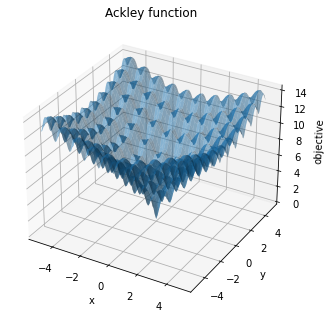

In [5]:
# Visualization
fig = plt.figure()
ax = Axes3D(fig)
ax.set_title("Ackley function")
ax.set_xlabel("x")
ax.set_ylabel("y")
ax.set_zlabel("objective")

x = np.arange(-5, 5, 0.1)
y = np.arange(-5, 5, 0.1)

X, Y = np.meshgrid(x, y)
Z = Ackley_2d(X, Y)

ax.plot_surface(X, Y, Z, alpha=0.5);

# Optimization
- Random search
- Bayesian Optimization
    - TPE
    - Multivariate TPE
- CMA-ES

In [6]:
# Use optuna
def objective(trial):
    x = trial.suggest_uniform("x", -5, 5)
    y = trial.suggest_uniform("y", -5, 5)
    return Ackley_2d(x, y)

### Random search

Best value : 3.117112319499999
Best param : {'x': 1.0956433397989684, 'y': 0.0267902322886151}



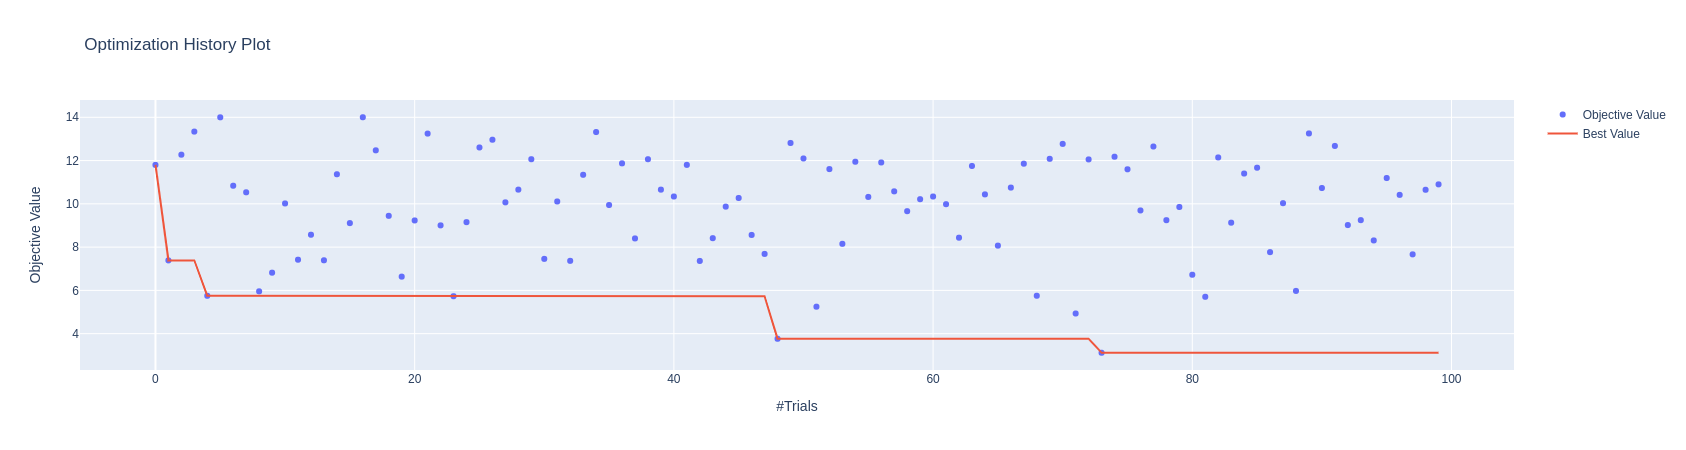

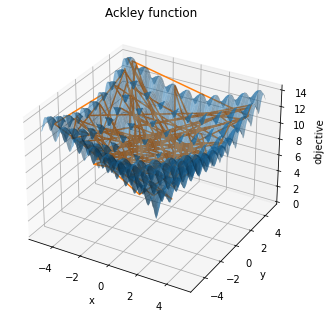

In [12]:
study = optuna.create_study()
study.sampler = optuna.samplers.RandomSampler(seed=42)
study.optimize(objective, n_trials=100)
print(f"Best value : {study.best_value}")
print(f"Best param : {study.best_params}")

print()

optuna.visualization.plot_optimization_history(study).show()

print()

df = study.trials_dataframe()

fig = plt.figure()
ax = Axes3D(fig)
ax.set_title("Ackley function")
ax.set_xlabel("x")
ax.set_ylabel("y")
ax.set_zlabel("objective")

x = np.arange(-5, 5, 0.1)
y = np.arange(-5, 5, 0.1)

X, Y = np.meshgrid(x, y)
Z = Ackley_2d(X, Y)

trial_x = df["params_x"]
trial_y = df["params_y"]
trial_value = df["value"]

ax.plot_surface(X, Y, Z, alpha=0.5)
ax.plot(trial_x, trial_y, trial_value);

### TPE

Best value : 0.20138546830680548
Best param : {'x': 0.04595188197167854, 'y': -0.017014867737136008}



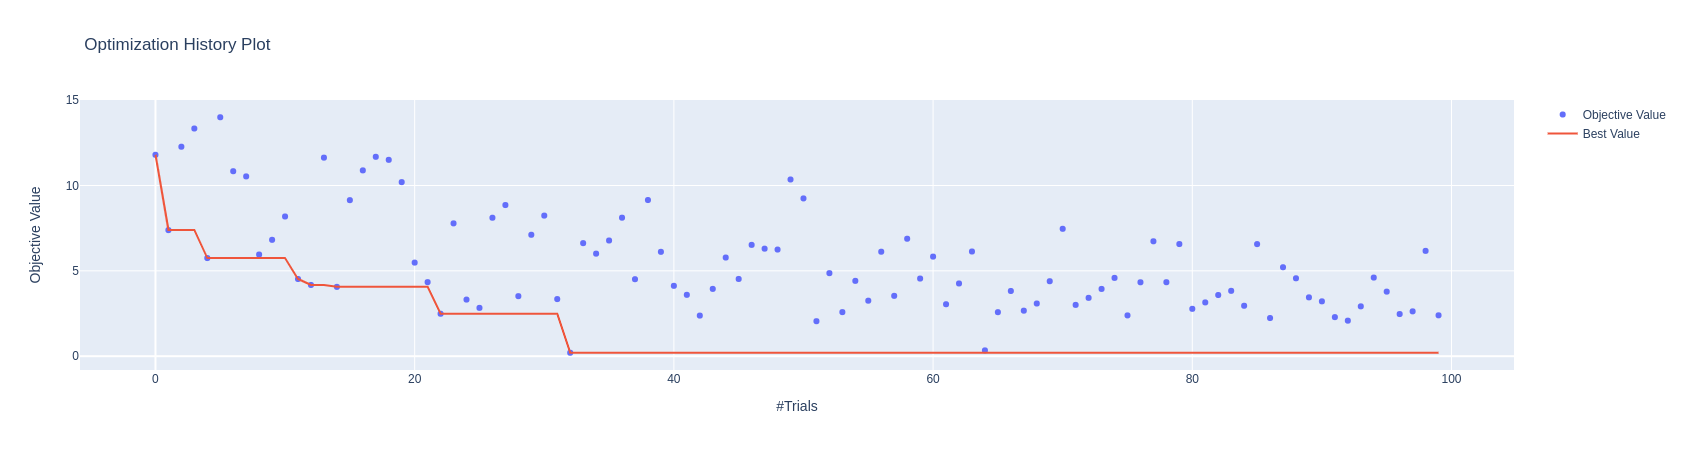

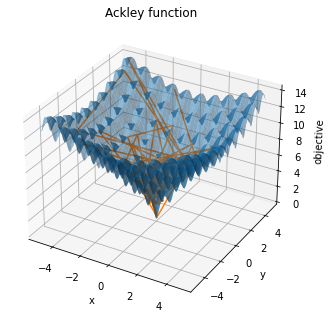

In [13]:
study = optuna.create_study()
study.sampler = optuna.samplers.TPESampler(seed=42)
study.optimize(objective, n_trials=100)
print(f"Best value : {study.best_value}")
print(f"Best param : {study.best_params}")

print()

optuna.visualization.plot_optimization_history(study).show()

print()

df = study.trials_dataframe()

fig = plt.figure()
ax = Axes3D(fig)
ax.set_title("Ackley function")
ax.set_xlabel("x")
ax.set_ylabel("y")
ax.set_zlabel("objective")

x = np.arange(-5, 5, 0.1)
y = np.arange(-5, 5, 0.1)

X, Y = np.meshgrid(x, y)
Z = Ackley_2d(X, Y)

trial_x = df["params_x"]
trial_y = df["params_y"]
trial_value = df["value"]

ax.plot_surface(X, Y, Z, alpha=0.5)
ax.plot(trial_x, trial_y, trial_value);

### Multivariate-TPE

/home/norihitoishida/.local/lib/python3.8/site-packages/optuna/samplers/_tpe/sampler.py:188: ExperimentalWarning:

``multivariate`` option is an experimental feature. The interface can change in the future.



Best value : 1.0051976680597412
Best param : {'x': -0.026879674783751945, 'y': -0.1568099034037388}



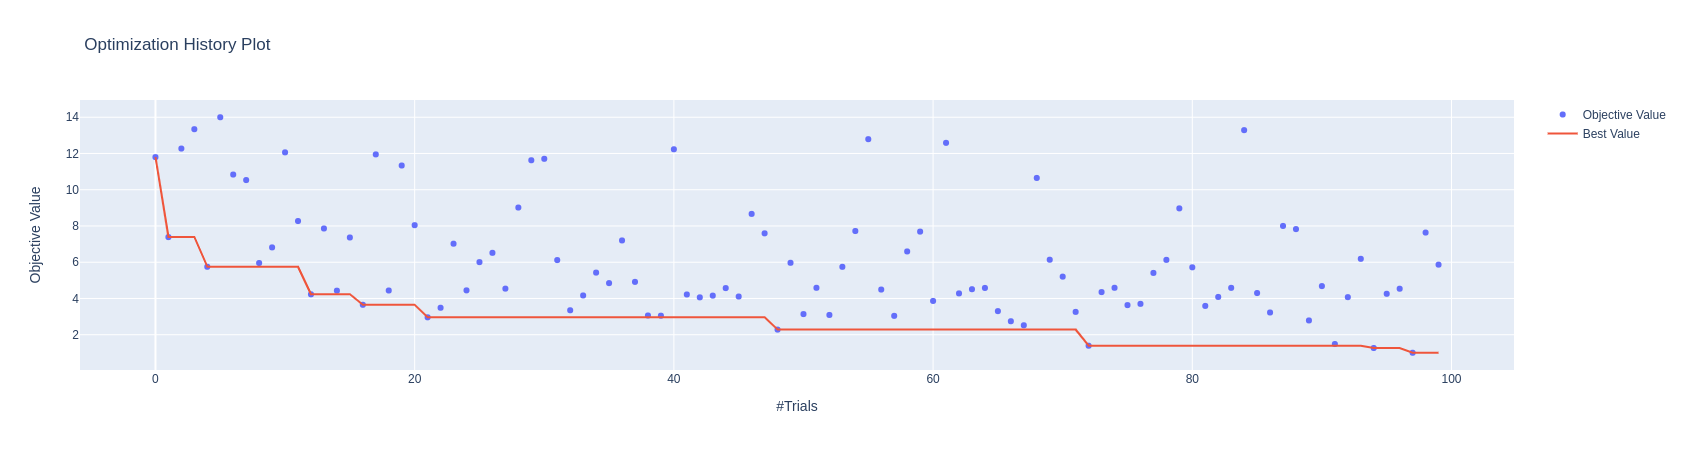

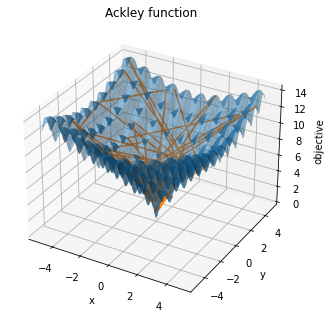

In [14]:
study = optuna.create_study()
study.sampler = optuna.samplers.TPESampler(seed=42, multivariate=True)
study.optimize(objective, n_trials=100)
print(f"Best value : {study.best_value}")
print(f"Best param : {study.best_params}")

print()

optuna.visualization.plot_optimization_history(study).show()

print()

df = study.trials_dataframe()

fig = plt.figure()
ax = Axes3D(fig)
ax.set_title("Ackley function")
ax.set_xlabel("x")
ax.set_ylabel("y")
ax.set_zlabel("objective")

x = np.arange(-5, 5, 0.1)
y = np.arange(-5, 5, 0.1)

X, Y = np.meshgrid(x, y)
Z = Ackley_2d(X, Y)

trial_x = df["params_x"]
trial_y = df["params_y"]
trial_value = df["value"]

ax.plot_surface(X, Y, Z, alpha=0.5)
ax.plot(trial_x, trial_y, trial_value);

### CMA-ES

Best value : 0.05323376707917982
Best param : {'x': -0.0019098469677680877, 'y': 0.016207044331769456}



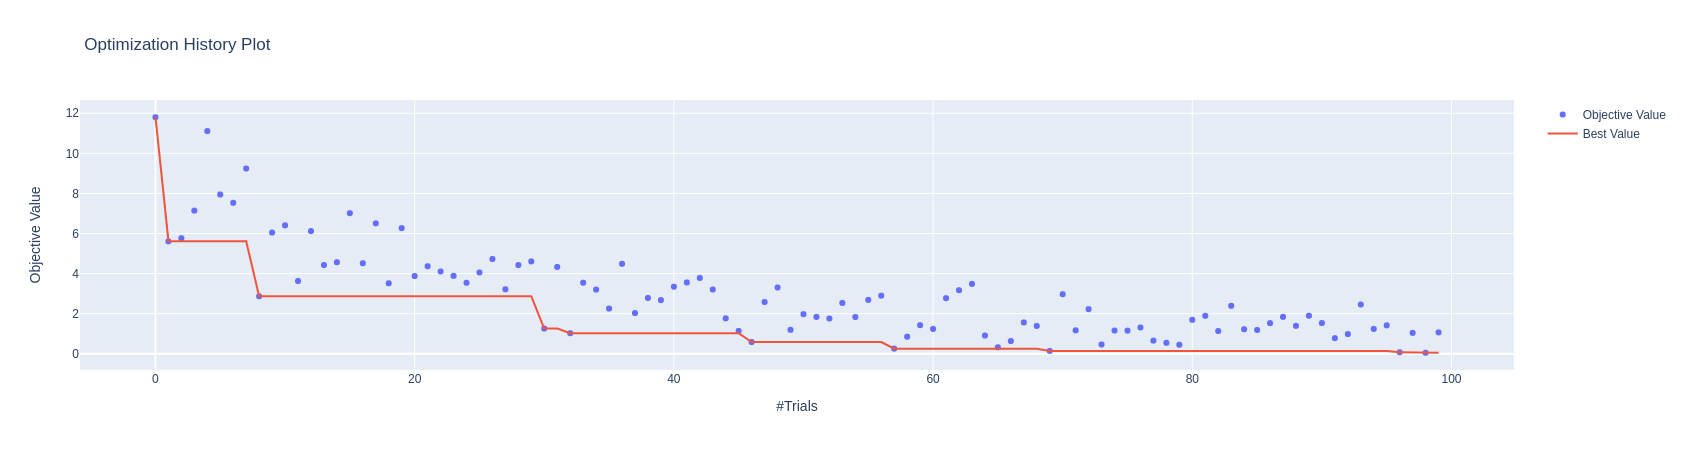

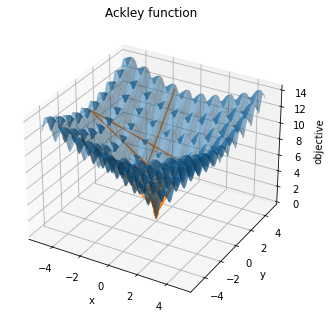

In [15]:
study = optuna.create_study()
study.sampler = optuna.samplers.CmaEsSampler(seed=42)
study.optimize(objective, n_trials=100)
print(f"Best value : {study.best_value}")
print(f"Best param : {study.best_params}")

print()

optuna.visualization.plot_optimization_history(study).show()

print()

df = study.trials_dataframe()

fig = plt.figure()
ax = Axes3D(fig)
ax.set_title("Ackley function")
ax.set_xlabel("x")
ax.set_ylabel("y")
ax.set_zlabel("objective")

x = np.arange(-5, 5, 0.1)
y = np.arange(-5, 5, 0.1)

X, Y = np.meshgrid(x, y)
Z = Ackley_2d(X, Y)

trial_x = df["params_x"]
trial_y = df["params_y"]
trial_value = df["value"]

ax.plot_surface(X, Y, Z, alpha=0.5)
ax.plot(trial_x, trial_y, trial_value);